In [1]:
#这个操作就是把真实数据到了进来
import xlrd
import math
from functools import reduce
import networkx as nx
import sys
import matplotlib.pyplot as plt
import random
import operator
import tqdm
import community
from pandas import Series


In [2]:
G=nx.karate_club_graph()
num_node=G.number_of_nodes()
num_edge=G.number_of_edges()
print('节点个数：', num_node)
print('边数为：', num_edge)

节点个数： 34
边数为： 78


In [160]:
length = list(nx.shortest_path_length(G))
nei = []  ##  构建邻居列表
for nei_source in G:
    nei.append([])
    for nei_target in G:
        try:
            if length[nei_source][1][nei_target] == 1:
                nei[nei_source].append(nei_target)
        except:
            continue
rand = []
for rand_i in G:
    if G.degree(rand_i) != 0:
        rand.append(1 / G.degree(rand_i))
    else:
        rand.append(1)
        
lizi=[0,32]
K=len(lizi)
N_cishu = []
for i in G:
    N_cishu.append([1] * K)
    
E = []
for i in range(K):
    E.append([0.5])
    for j in G:
        E[i].append(0.5)
sanjiao = 0.4
lishu = [-1] * num_node

####开始游走
time=0
time_max=200
bianliquan = 1
while (time < time_max) and (bianliquan == 1):  # 小的用这个
    #     for time in tqdm.trange(time_max):
    bianliquan = 0  # bianliquan=1的时候说明还有没有遍历到的点，会导致隶属判断出错
    time += 1
    lizi_t_1 = [-1] * K
    for i in range(num_node):  # 这里判断各个点的隶属情况
        lishu[i] = N_cishu[i].index(max(N_cishu[i]))

    for k in range(K):  # 当前算第k个粒子
        rand_pref = []
        for j in nei[lizi[k]]:  # j是粒子邻居
            rand_pref.append(0.2 * rand[lizi[k]] + 0.8 * pref(lizi[k], j, k))
        lizi_t_1[k] = lizi[k]
        if len(nei[lizi[k]]) > 0:
            lizi[k] = rand_pick(nei[lizi[k]], rand_pref)

        if lishu[lizi[k]] == lishu[lizi_t_1[k]]:
            E[k][lizi[k]] = E[k][lizi[k]] + sanjiao
        else:
            E[k][lizi[k]] -= sanjiao
        if E[k][lizi[k]] > 1:
            E[k][lizi[k]] = 1
        elif E[k][lizi[k]] < 0:
            #             print(lizi[k],E_best(k))#这个是显示粒子回家的
            E[k][lizi[k]] = 0
            lizi[k] = E_best(k)
        N_cishu[lizi[k]][k] += 1
    for i in range(len(N_cishu)):  # 现在是全部节点被遍历一遍可以结束 应该改成前后两个状态相似（收敛）
        if len(set(N_cishu[i])) == 1:
            bianliquan = 1

    if time > 2 * time_max:
        print('Not enough')
        break

for node in G:
    if len(set(N_cishu[node]))==1:
        zhi0(N_cishu[node])
        for node_nei in nei[node]:
            add_list(N_cishu[node],N_cishu[node_nei],len(nei[node]))
color_list=[]
for i in range(len(G)):
    color_list.append(N_cishu[i].index(max(N_cishu[i])))
    if len(set(N_cishu[i])) == 1:
        color_list[-1]=-1        
#     nx.draw(G,pos = nx.spring_layout(G),node_color = color_list,edge_color = 'y',with_labels = True,font_size =10,node_size =80)





In [161]:
# color_list

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


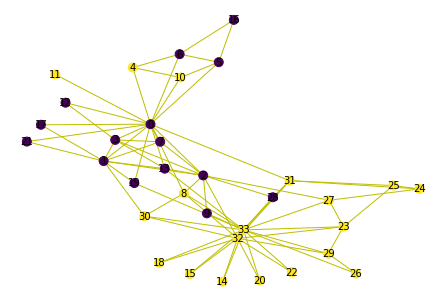

In [162]:
nx.draw(G,pos = nx.spring_layout(G),node_color = color_list,edge_color = 'y',with_labels = True,font_size =10,node_size =80)

In [18]:
nei

[[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31],
 [0, 2, 3, 7, 13, 17, 19, 21, 30],
 [0, 1, 3, 7, 8, 9, 13, 27, 28, 32],
 [0, 1, 2, 7, 12, 13],
 [0, 6, 10],
 [0, 6, 10, 16],
 [0, 4, 5, 16],
 [0, 1, 2, 3],
 [0, 2, 30, 32, 33],
 [2, 33],
 [0, 4, 5],
 [0],
 [0, 3],
 [0, 1, 2, 3, 33],
 [32, 33],
 [32, 33],
 [5, 6],
 [0, 1],
 [32, 33],
 [0, 1, 33],
 [32, 33],
 [0, 1],
 [32, 33],
 [25, 27, 29, 32, 33],
 [25, 27, 31],
 [23, 24, 31],
 [29, 33],
 [2, 23, 24, 33],
 [2, 31, 33],
 [23, 26, 32, 33],
 [1, 8, 32, 33],
 [0, 24, 25, 28, 32, 33],
 [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33],
 [8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]]

In [67]:
N_cishu

[[46, 11],
 [17, 4],
 [4, 46],
 [2, 24],
 [2, 6],
 [15, 6],
 [12, 5],
 [11, 2],
 [12, 6],
 [2, 12],
 [10, 8],
 [4, 1],
 [1, 7],
 [9, 2],
 [1, 6],
 [9.0, 15.0],
 [10, 1],
 [6, 2],
 [3, 2],
 [6, 3],
 [3, 2],
 [10, 1],
 [2, 3],
 [3, 2],
 [1, 4],
 [1, 5],
 [4.0, 13.0],
 [3.0, 19.0],
 [1, 9],
 [4, 2],
 [9, 3],
 [2, 12],
 [14, 6],
 [4, 24]]

In [41]:
N_cishu[3]

[10, 6, 1]

In [42]:
add_list(N_cishu[2],N_cishu[3])

[11, 22, 3]

In [47]:
###########各种函数###############
#上面那个写的不好 时间复杂大
#写了个邻居节点的函数，返回0项是邻居节点，返回1项是度中心性

def Find_nei(node):
    neibor=[]
    for target in G:
        try:
            if (length[node][1][target]==1):
                neibor.append(target)
        except:
            continue

    return neibor

def pref(pref_i, pref_j, pref_k):  # 这个是 第k个粒子在第i个节点邻居节点j的 优先转移的概率
    num_kong = 0
    for j_t in nei[pref_i]:  # 邻接节点
        a = N_kong(j_t)
        num_kong += a[0][pref_k]
    return N_kong(pref_j)[0][pref_k]/num_kong


def N_kong(N_kong_i):
    N_kong_0 = []
    total_N = 0
    for N_kong_k in range(K):
        total_N += N_cishu[N_kong_i][N_kong_k]
    for k in range(K):
        N_kong_0.append(N_cishu[N_kong_i][k]/total_N)
    return N_kong_0, total_N  # 返回两个量 第一个是控制矩阵，当前粒子访问节点i的相对频率，第二个是节点i被访问的总次数
# import random#这是一个按照概率选取数字的函数


def rand_pick(seq, probabilities):
    x = random.uniform(0, 1)
    cumprob = 0.0
    for item, item_pro in zip(seq, probabilities):
        cumprob += item_pro
        if x < cumprob:
            break
    return item
#  现在要设置一个能量变量


def E_test(E_test_k, E_test_j, E_test_lizi_t_1):
    test=0
    if lishu[lizi[E_test_k]] == lishu[E_test_lizi_t_1]:
        E[E_test_k][E_test_j]+=sanjiao
    else:
        E[E_test_k][E_test_j]-=sanjiao
    if E[E_test_k][E_test_j]>1:
        E[E_test_k][E_test_j]=1
    elif E[E_test_k][E_test_j]<0:
        E[E_test_k][E_test_j]=1
        test=1
        print(E_test_k,E_test_j)
    return test        
def E_best(E_best_k):
    return E[k].index(max(E[E_best_k]))


def tong_zitu (node_a, node_b):
    for tong_zitu_i in range(len(zitu)):
        if(node_a in zitu[tong_zitu_i]) and (node_b in zitu[tong_zitu_i]):
            return 1
    return 0
def jishi():
    import time
    return time.time()

#coding:utf-8
import collections
import random
import networkx as nx

def JACCARD(J_list,J_list_0):
    try:
        time_shequ = min(len(J_list), len(J_list_0))  # 相邻社区JACCARD相似度模块
        jaccard = 0
        shequ_kong_num=0
        for c1 in range(time_shequ):
            pipei = 0
            if J_list[c1] == []:
                shequ_kong_num += 1
                continue
            for c2 in range(time_shequ):

                t = (len(set(J_list[c1]) & set(J_list_0[c2])) / (len(set(J_list[c1]).union(set(J_list_0[c2])))))
                if (t > pipei):
                    pipei = t
            jaccard += pipei
        jaccard = jaccard / (time_shequ - shequ_kong_num)
        return jaccard
    except:
        return 'JACCARD初始化'

def NMI(A,B):
    nmi_shang = 0
    nmi_xia=0
    ca=len(A)
    cb=len(B)
    n_nmi = len(G)
    nmi_na=list(map(lambda a: len(a),A))
    nmi_nb=list(map(lambda b: len(b),B))

    for i_nmi in range(ca):
        for j_nmi in range(cb):
            nij = len(set(A[i_nmi]) & set(B[j_nmi]))
            if nij != 0:
                nmi_shang += -2 * (nij * math.log((nij * n_nmi)/(nmi_na[i_nmi] * nmi_nb[j_nmi])))
#             else:
#                 nmi_shang += -2 * (nij * -50)
    for i_nmi in range(ca):
        if nmi_na[i_nmi] != 0:
            nmi_xia+=nmi_na[i_nmi]*math.log(nmi_na[i_nmi]/n_nmi)

    for j_nmi in range(cb):
        if nmi_nb[j_nmi] != 0:
            nmi_xia+=nmi_nb[j_nmi]*math.log(nmi_nb[j_nmi]/n_nmi)


    return nmi_shang/nmi_xia

    
class LPA():
    def __init__(self, G, max_iter = 20):
        self._G = G
        self._n = len(G.node) #number of nodes
        self._max_iter = self._n
        self.biaoqian=[]
    def can_stop(self):
        # all node has the label same with its most neighbor
        for i in range(self._n):
            node = self._G.node[i]
            label = node["label"]
            max_labels = self.get_max_neighbor_label(i)
            if(label not in max_labels):
                return False
        return True

    def get_max_neighbor_label(self,node_index):
        m = collections.defaultdict(int)
        for neighbor_index in self._G.neighbors(node_index):
            neighbor_label = self._G.node[neighbor_index]["label"]
            m[neighbor_label] += 1
        max_v = max(m.values())
        return [item[0] for item in m.items() if item[1] == max_v]


    '''asynchronous update'''
    def populate_label(self):
        #random visit
        visitSequence = random.sample(self._G.nodes(),len(self._G.nodes()))
        for i in visitSequence:
            node = self._G.node[i]
            label = node["label"]
            max_labels = self.get_max_neighbor_label(i)
            if(label not in max_labels):
                newLabel = random.choice(max_labels)
                node["label"] = newLabel
        return node

    def get_communities(self):
        communities = collections.defaultdict(lambda:list())
#         print('self._G.nodes(True):',self._G.nodes(True))
        for node in self._G.nodes(True):
#             print('label:',node[1])
            label = node[1]["label"]
#             print('communities[label]:',communities[label])
            communities[label].append(node[0])
        return communities.values()

    def execute(self):#执行程序
#         print(shuru,'QQQQQQQQQQQQQ')
        #initial label
        for i in range(self._n):#初始化标签
            self._G.node[i]["label"] = i
        iter_time = 0
    #         populate label
        while(not self.can_stop() and iter_time<self._max_iter):#判断是否收敛
            self.populate_label()
            iter_time += 1
        return self.get_communities()


def gengxin_lishu(node_find,shequ_input):
    for i_shequ_input in range(len(shequ_input)):
        if node_find in shequ_input[i_shequ_input]:
            return i_shequ_input
    return -1

def zhi0(L):  #列表元素全部置零
    for ys in range(len(L)):
        L[ys]=0
    return L

def add_list(L1,L2,fenmu):
    for a_l in range(len(L1)):
        L1[a_l]=L1[a_l]+L2[a_l]/fenmu
    return L1